In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler 
import numpy as np

## Import Data

In [2]:
data = pd.read_csv('Data UMKM new.csv', delimiter=';')
data

,Nama sentra,Kode sentra,Alamat,Kecamatan,Kelurahan,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,SWK Kendung,NaN,Jl. raya Kendung,BENOWO,SEMEMI,213.63,9,7,0.7777777777777778,5,0.714286
1,SWK Ketabang,NaN,Jl. Inspeksi Ketabang Kali,GENTENG,EMBONG KALIASIN,569.30,38,38,1,38,1.000000
2,SWK Babat Jerawat,NaN,Jl. Raya Babat Jerawat,PAKAL,BABAT JERAWAT,1412.00,28,27,0.9642857142857143,27,1.000000
3,SWK Balas Klumprik,NaN,Jl. Balas Klumprik,WIYUNG,BALAS KLUMPRIK,560.00,15,11,0.7333333333333333,6,0.545455
4,SWK Bentul,NaN,Jl. Bentul,WONOKROMO,JAGIR,227.50,20,20,1,14,0.700000
5,SWK Bratang Binangun,NaN,Jl. Raya Manyar No. 80A,GUBENG,BARATAJAYA,2000.00,52,46,0.8846153846153846,41,0.891304
6,SWK Convention Hall,NaN,Jl. Arief Rahman Hakim No.131-133. Keputih. Ke...,SUKOLILO,GEBANG PUTIH,960.00,40,37,0.925,20,0.540541
7,SWK Deles Merr,NaN,Arif Rahman Hakim No.14 Kelurahan Klampis Ngasem,SUKOLILO,KLAMPIS NGASEM,890.00,36,31,0.8611111111111112,25,0.806452
8,SWK Dharmahusada,NaN,Pojok Timur. Jl. Dharmahusada. Mulyorejo. Kec....,GUBENG,MOJO,350.00,21,34,1.619.047.619.047.610,32,0.941176
9,SWK Dharmawangsa,NaN,Jl. Raya Dharmawangsa,GUBENG,AIRLANGGA,500.00,26,25,0.9615384615384616,25,1.000000


## Cek Tipe Data

In [3]:
data.dtypes

Nama sentra                                                        object
Kode sentra                                                       float64
Alamat                                                             object
Kecamatan                                                          object
Kelurahan                                                          object
Luas sentra (m2)                                                  float64
Kapasitas                                                           int64
Jumlah pelaku usaha                                                 int64
Okupansi sentra (%)                                                object
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah          int64
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah    float64
dtype: object

## Cek Missing Value Data

In [4]:
data.isna().sum()

Nama sentra                                                        0
Kode sentra                                                       48
Alamat                                                             0
Kecamatan                                                          0
Kelurahan                                                          0
Luas sentra (m2)                                                   2
Kapasitas                                                          0
Jumlah pelaku usaha                                                0
Okupansi sentra (%)                                                0
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah         0
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah     0
dtype: int64

## Replace Missing Value

In [5]:
mean = data["Luas sentra (m2)"].mean()
data["Luas sentra (m2)"] = data["Luas sentra (m2)"].replace(np.nan, mean)
data

,Nama sentra,Kode sentra,Alamat,Kecamatan,Kelurahan,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,SWK Kendung,NaN,Jl. raya Kendung,BENOWO,SEMEMI,213.63000,9,7,0.7777777777777778,5,0.714286
1,SWK Ketabang,NaN,Jl. Inspeksi Ketabang Kali,GENTENG,EMBONG KALIASIN,569.30000,38,38,1,38,1.000000
2,SWK Babat Jerawat,NaN,Jl. Raya Babat Jerawat,PAKAL,BABAT JERAWAT,1412.00000,28,27,0.9642857142857143,27,1.000000
3,SWK Balas Klumprik,NaN,Jl. Balas Klumprik,WIYUNG,BALAS KLUMPRIK,560.00000,15,11,0.7333333333333333,6,0.545455
4,SWK Bentul,NaN,Jl. Bentul,WONOKROMO,JAGIR,227.50000,20,20,1,14,0.700000
5,SWK Bratang Binangun,NaN,Jl. Raya Manyar No. 80A,GUBENG,BARATAJAYA,2000.00000,52,46,0.8846153846153846,41,0.891304
6,SWK Convention Hall,NaN,Jl. Arief Rahman Hakim No.131-133. Keputih. Ke...,SUKOLILO,GEBANG PUTIH,960.00000,40,37,0.925,20,0.540541
7,SWK Deles Merr,NaN,Arif Rahman Hakim No.14 Kelurahan Klampis Ngasem,SUKOLILO,KLAMPIS NGASEM,890.00000,36,31,0.8611111111111112,25,0.806452
8,SWK Dharmahusada,NaN,Pojok Timur. Jl. Dharmahusada. Mulyorejo. Kec....,GUBENG,MOJO,350.00000,21,34,1.619.047.619.047.610,32,0.941176
9,SWK Dharmawangsa,NaN,Jl. Raya Dharmawangsa,GUBENG,AIRLANGGA,500.00000,26,25,0.9615384615384616,25,1.000000


In [6]:
data.isna().sum()

Nama sentra                                                        0
Kode sentra                                                       48
Alamat                                                             0
Kecamatan                                                          0
Kelurahan                                                          0
Luas sentra (m2)                                                   0
Kapasitas                                                          0
Jumlah pelaku usaha                                                0
Okupansi sentra (%)                                                0
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah         0
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah     0
dtype: int64

## Menghapus beberapa variabel untuk melakukan pemodelan

In [7]:
all_data = data.drop(data.columns[[0, 1, 2, 3, 4, 8, 10]], axis=1)
all_data

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,213.63000,9,7,5
1,569.30000,38,38,38
2,1412.00000,28,27,27
3,560.00000,15,11,6
4,227.50000,20,20,14
5,2000.00000,52,46,41
6,960.00000,40,37,20
7,890.00000,36,31,25
8,350.00000,21,34,32
9,500.00000,26,25,25


In [8]:
all_data.mean()

Luas sentra (m2)                                              662.599130
Kapasitas                                                      30.083333
Jumlah pelaku usaha                                            24.333333
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah     17.562500
dtype: float64

In [9]:
all_data.median()

Luas sentra (m2)                                              564.65
Kapasitas                                                      27.00
Jumlah pelaku usaha                                            20.50
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah     14.00
dtype: float64

## Normalisasi Data

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

norm_all = pd.DataFrame(scaled_data, columns = all_data.columns)
norm_all

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,-1.162807,-1.128038,-1.090876,-0.898956
1,-0.241640,0.423571,0.860114,1.462481
2,1.940910,-0.111466,0.167827,0.675335
3,-0.265727,-0.807015,-0.839135,-0.827398
4,-1.126885,-0.539496,-0.272719,-0.254928
5,3.463800,1.172624,1.363595,1.677157
6,0.770253,0.530579,0.797178,0.174424
7,0.588957,0.316564,0.419568,0.532218
8,-0.809616,-0.485992,0.608373,1.033129
9,-0.421123,-0.218474,0.041957,0.532218


## Tiga plot Dendrogram menggunakan metode Hierarchical Clustering dengan algoritma yang berbeda: Complete Linkage, Single Linkage, Average Linkage, dan Ward Lingkage.

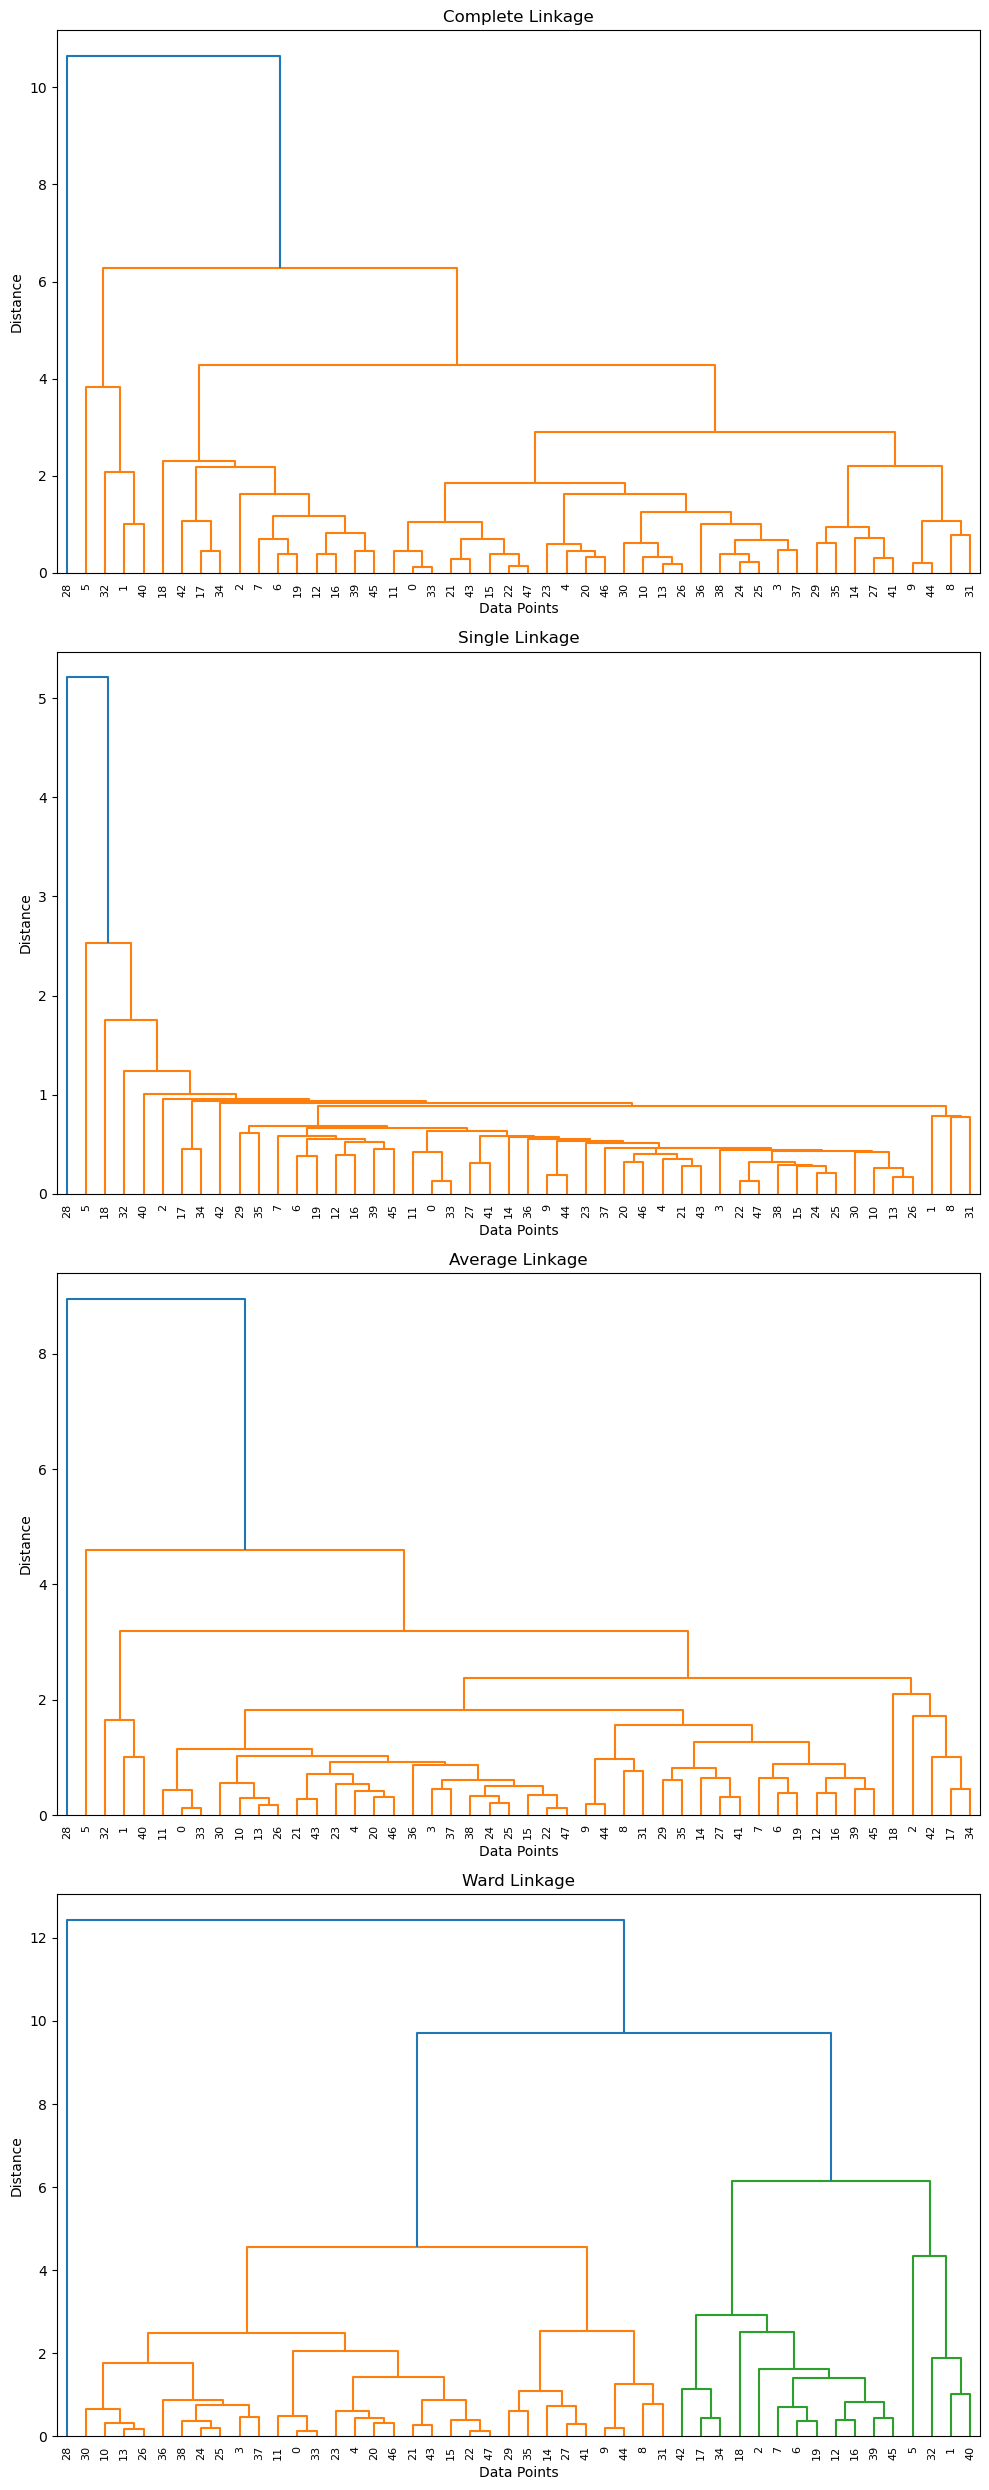

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(10, 25))

methods = ["complete", "single", "average", "ward"]
linkages = []

for i, method in enumerate(methods):
    linkages.append(linkage(norm_all, method=method, metric="euclidean"))
    dendrogram(linkages[i], ax=axs[i])
    axs[i].set_title(f'{method.capitalize()} Linkage')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

## Penentuan jarak pengukuran kemiripan terbaik dan algoritma yang optimal

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Metode Single Linkage
single_clustering = linkage(norm_all, method="single", metric="euclidean")
coph_single, coph_dists_single = cophenet(single_clustering, pdist(norm_all))

# Metode Complete Linkage
complete_clustering = linkage(norm_all, method="complete", metric="euclidean")
coph_complete, coph_dists_complete = cophenet(complete_clustering, pdist(norm_all))

# Metode Average Linkage
average_clustering = linkage(norm_all, method="average", metric="euclidean")
coph_average, coph_dists_average = cophenet(average_clustering, pdist(norm_all))

# Metode Ward Linkage
ward_clustering = linkage(norm_all, method="ward", metric="euclidean")
coph_ward, coph_dists_ward = cophenet(ward_clustering, pdist(norm_all))

print(F'Korelasi Cophenetic (Single Linkage): {coph_single:.4f}')
print(F'Korelasi Cophenetic (Complete Linkage): {coph_complete:.4f}')
print(F'Korelasi Cophenetic (Average Linkage): {coph_average:.4f}')
print(F'Korelasi Cophenetic (Ward Linkage): {coph_ward:.4f}')

Korelasi Cophenetic (Single Linkage): 0.9111
Korelasi Cophenetic (Complete Linkage): 0.8734
Korelasi Cophenetic (Average Linkage): 0.9317
Korelasi Cophenetic (Ward Linkage): 0.6368


## Menentukan jumlah cluster yang representatif dalam proses clustering dengan metode koefisien silhouette 

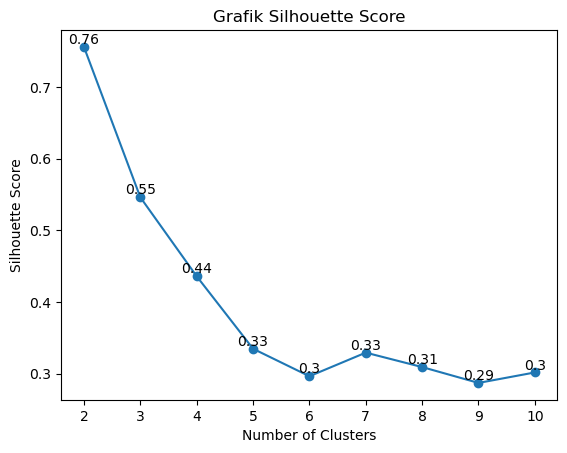

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    cluster_labels = clusterer.fit_predict(norm_all)
    silhouette_avg = silhouette_score(norm_all, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, round(score, 2), ha='center', va='bottom')  
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Grafik Silhouette Score')
plt.show()

In [14]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(norm_all)
labels = agglo.labels_
hasil_agglo = pd.concat([norm_all, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,0
1,-0.241640,0.423571,0.860114,1.462481,0
2,1.940910,-0.111466,0.167827,0.675335,0
3,-0.265727,-0.807015,-0.839135,-0.827398,0
4,-1.126885,-0.539496,-0.272719,-0.254928,0
5,3.463800,1.172624,1.363595,1.677157,0
6,0.770253,0.530579,0.797178,0.174424,0
7,0.588957,0.316564,0.419568,0.532218,0
8,-0.809616,-0.485992,0.608373,1.033129,0
9,-0.421123,-0.218474,0.041957,0.532218,0


In [18]:
hasil_agglo.to_csv('hasil_agglo.csv', index=False)

In [19]:
clustering = pd.read_csv("Hasil_Clustering.csv")
clustering

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,0
1,-0.241640,0.423571,0.860114,1.462481,0
2,1.940910,-0.111466,0.167827,0.675335,0
3,-0.265727,-0.807015,-0.839135,-0.827398,0
4,-1.126885,-0.539496,-0.272719,-0.254928,0
5,3.463800,1.172624,1.363595,1.677157,0
6,0.770253,0.530579,0.797178,0.174424,0
7,0.588957,0.316564,0.419568,0.532218,0
8,-0.809616,-0.485992,0.608373,1.033129,0
9,-0.421123,-0.218474,0.041957,0.532218,0


In [21]:
# Filter baris-baris dengan cluster '0'
cluster_0 = clustering[clustering['cluster'] == 0]

# Hitung rata-rata dari kolom-kolom dalam cluster '0'
rata_rata_cluster_0 = cluster_0.mean()

# Tampilkan rata-rata
rata_rata_cluster_0

Luas sentra (m2)                                             -0.015330
Kapasitas                                                    -0.111466
Jumlah pelaku usaha                                          -0.109355
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah   -0.098108
cluster                                                       0.000000
dtype: float64

In [22]:
# Filter baris dengan cluster '01
cluster_1 = clustering[clustering['cluster'] == 1]

# Hitung rata-rata dari kolom-kolom dalam cluster '0'
rata_rata_cluster_1 = cluster_1.mean()

# Tampilkan rata-rata
rata_rata_cluster_1

Luas sentra (m2)                                              0.720526
Kapasitas                                                     5.238910
Jumlah pelaku usaha                                           5.139703
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah    4.611064
cluster                                                       1.000000
dtype: float64